In [1]:
%matplotlib inline

from __future__ import division, print_function
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import kcorrect
import os

In [2]:
a = np.array([1,5,7])
b = np.array([2,3,6])
c = np.concatenate([a,b])

order = np.argsort(c)
print(c)
print(order)
print(np.argsort(order))

[1 5 7 2 3 6]
[0 3 4 1 5 2]
[0 3 5 1 2 4]


In [107]:
def CvM_cdf(n1, n2, y1, y2):
    '''
    Calculate Anderson-Darling statistic from two CDFs;
    y1: CDF of the mock distribution;
    y2: CDF of the observed distribution.
    '''
    n = n1+n2
    h = (n1*y1+n2*y2)/n
    cvm_stat = n1*n2/n * np.trapz((y2-y1)**2, h)
    cvm_stat = np.trapz((y2-y1)**2, h)
    
#     plt.figure(figsize=(6, 6))
#     plt.plot(h, y1)
#     plt.plot(h, y2)
#     plt.show()

    return cvm_stat

def CvM_cdf_omegasq(n1, n2, y1, y2):
    '''
    Calculate Anderson-Darling statistic from two CDFs;
    y1: CDF of the mock distribution;
    y2: CDF of the observed distribution.
    '''
    n = n1+n2
    h = (n1*y1+n2*y2)/n
    cvm_stat = np.trapz((y2-y1)**2, h)

    return cvm_stat


def CvM(x, y, noise=1e-6):
    '''
    Calculate Anderson-Darling statistic from two samples directly;
    x, y: observed values in the two samples;
    noise: noise to add to the values to break ties. 
    '''
    n = len(x)
    m = len(y)
    
    x = x + noise*np.random.randn(n)
    y = y + noise*np.random.randn(m)
    
    xy = np.concatenate([x, y])
    order = np.argsort(xy)
    rank = np.argsort(order)+1
    r = rank[:len(x)]
    s = rank[len(x):]
    u = n*np.sum((r-(np.arange(n)+1))**2) + m*np.sum((s-(np.arange(m)+1))**2)
    
    t = u/(n*m*(n+m)) - (4*n*m-1)/(6*(n+m))
#     t = (4*n*m-1)/(6*(n+m))
#     t = u/(n*m*(n+m))
    return t

In [113]:
a = np.random.randn(10)
b = np.random.randn(100000)

In [118]:
bins = np.linspace(-5, 5, 1000)

hist, bin_edges = np.histogram((a), bins=bins)
hist = hist/np.sum(hist)
binctr = (bin_edges[1:] + bin_edges[:-1])/2.
cdf1 = np.zeros(len(hist))
cdf1[0] = hist[0]
for cdf_index in range(1, len(hist)):
    cdf1[cdf_index] = cdf1[cdf_index-1]+hist[cdf_index]
    
hist, bin_edges = np.histogram((b), bins=bins)
hist = hist/np.sum(hist)
binctr = (bin_edges[1:] + bin_edges[:-1])/2.
cdf2 = np.zeros(len(hist))
cdf2[0] = hist[0]
for cdf_index in range(1, len(hist)):
    cdf2[cdf_index] = cdf2[cdf_index-1]+hist[cdf_index]
print(CvM_cdf(len(a), len(b), cdf1, cdf2))

print(CvM_cdf_omegasq(len(a), len(b), cdf1, cdf2))
print(CvM_cdf(len(a), len(b), cdf1, cdf2))

print(10*CvM_cdf_omegasq(len(a), len(b), cdf1, cdf2))

0.012455220166
0.012455220166
0.012455220166
0.12455220166


In [119]:
cvm_test(a, norm(0, 1))

GofResult(statistic=0.12432272434651825, pvalue=0.48527713387556448)

/Users/roz18/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: overflow encountered in long_scalars


-18292945.7653


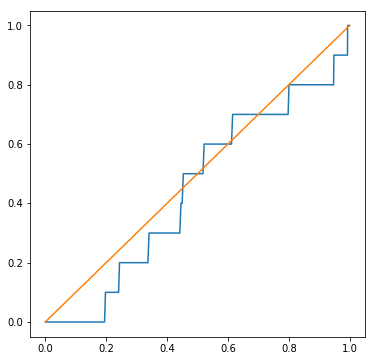

0.00710119620572


In [91]:
print(CvM(a, b))

bins = np.linspace(-5, 5, 1000)

hist, bin_edges = np.histogram((a), bins=bins)
hist = hist/np.sum(hist)
binctr = (bin_edges[1:] + bin_edges[:-1])/2.
cdf1 = np.zeros(len(hist))
cdf1[0] = hist[0]
for cdf_index in range(1, len(hist)):
    cdf1[cdf_index] = cdf1[cdf_index-1]+hist[cdf_index]
    
hist, bin_edges = np.histogram((b), bins=bins)
hist = hist/np.sum(hist)
binctr = (bin_edges[1:] + bin_edges[:-1])/2.
cdf2 = np.zeros(len(hist))
cdf2[0] = hist[0]
for cdf_index in range(1, len(hist)):
    cdf2[cdf_index] = cdf2[cdf_index-1]+hist[cdf_index]
print(CvM_cdf(len(a), len(b), cdf1, cdf2))

In [92]:
from scipy.stats import norm, uniform
from skgof import ks_test, cvm_test, ad_test

In [103]:
cvm_test(a, norm(0, 1))

GofResult(statistic=0.056283607384183393, pvalue=0.84855465460620627)

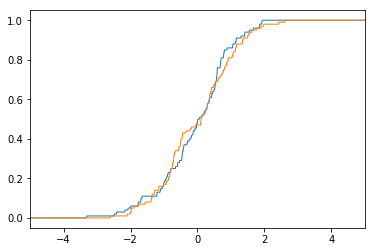

In [81]:
plt.plot(binctr, cdf1, lw=1)
plt.plot(binctr, cdf2, lw=1)
plt.xlim(-5,5)
plt.show()

-------------